In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np
import os
if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")
df = pd.read_excel('SCMre.xlsx')
df
df_nowon=df['지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)']=='노원구'
df_gangnam=df['지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)']=='강남구'
df.rename(columns={'지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)':'지역'}, inplace=True)
df
a=df[df_nowon]
b=df[df_gangnam]
#condition1 = (chinese.업종 == "숙박")
#df_nowon=df['지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)']=='노원구'
df_nowon=(df.지역=='노원구')
df_gangnam=(df.지역=='강남구')
#df_nowon=df['지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)']=='노원구'
#df_gangnam=df['지역(역삼동, 월계동, 여의도동, 잠실동, 종로구, 신림동, 은평동, 강서구)']=='강남구'
#print(df_nowon)
a
b

,차량 이름,"이용중인지(o,x)",차량 이용 가격,시간대,지역,주차장에서 이용중인 차 개수,주차장 내 차 개수,주차장 이름,km당 가격(최대),주차장_이용률
55,디 올뉴투싼,X,10000.0,9.0,강남구,10.0,16.0,현대백화점 무역센터점 별관주차장,220.0,0.62500
56,더뉴K3,X,10000.0,9.0,강남구,10.0,16.0,현대백화점 무역센터점 별관주차장,200.0,0.62500
57,더뉴레이,X,10000.0,9.0,강남구,10.0,16.0,현대백화점 무역센터점 별관주차장,190.0,0.62500
58,셀토스,X,10000.0,9.0,강남구,10.0,16.0,현대백화점 무역센터점 별관주차장,210.0,0.62500
59,올뉴아반떼,X,10000.0,9.0,강남구,10.0,16.0,현대백화점 무역센터점 별관주차장,200.0,0.62500
...,...,...,...,...,...,...,...,...,...,...
1829,2021 쏘렌토 7인승,O,36380.0,22.0,강남구,17.0,23.0,코엑스 옥상주차장,250.0,0.73913
1830,지프 레니게이드,O,32740.0,22.0,강남구,17.0,23.0,코엑스 옥상주차장,240.0,0.73913
1831,미니클럽맨,O,32740.0,22.0,강남구,17.0,23.0,코엑스 옥상주차장,250.0,0.73913
1832,2021 K5,O,31070.0,22.0,강남구,17.0,23.0,코엑스 옥상주차장,210.0,0.73913


In [5]:
gang_9=(b['시간대']==12.0 )
gang9=b[gang_9]
gang99=(gang9['이용중인지(o,x)']=='O')
gang9use=gang9[gang99]
tusan=(gang9use['차량 이름']=='디 올뉴투싼')
tg=gang9use[tusan]
utg=tg['주차장에서 이용중인 차 개수'].sum()
gang_9=(b['시간대']==12.0 )
gang9=b[gang_9]
gang_x9=(gang9['이용중인지(o,x)']=='X')
gang9nouse=gang9[gang_x9]
tusan=(gang9nouse['차량 이름']=='디 올뉴투싼')
tg=gang9nouse[tusan]
ntg=tg['주차장에서 이용중인 차 개수'].sum()
(utg)/(ntg+utg)

0.41025641025641024

In [6]:
length=gang9['차량 이름'].unique()
length

array(['미니클럽맨', '더뉴K3', '셀토스', '더뉴레이', '2021 K5', '올뉴아반떼', '캐스퍼', '더뉴아반떼',
       '아이오닉5', '더뉴코나', '디 올뉴스포티지', '모닝어반', '디 올뉴투싼', '코나', '제타', '올뉴K3',
       '벤츠 C200', 'K8', '더뉴그렌저', '카니발 프레스티지 9인승', '2021 쏘렌토 7인승',
       '지프 레니게이드', '아이오닉 일렉트릭', 'G80', '쏘나타 DN8', '스포티지 더볼드', '볼트EV',
       '쏘렌토', '올뉴모닝', '디올뉴투싼'], dtype=object)

In [56]:
df1 =pd.DataFrame()
my_list=length
for i in range(len(my_list)):
    tusan=(gang9use['차량 이름']==my_list[i])
    tg=gang9use[tusan]
    utg=tg['주차장에서 이용중인 차 개수'].sum()
    tusan=(gang9nouse['차량 이름']==my_list[i])
    tg=gang9nouse[tusan]
    ntg=tg['주차장에서 이용중인 차 개수'].sum()
    ratio=(utg)/(ntg+utg)
    df1 = df1.append(pd.DataFrame([[ratio]], columns=['count']), ignore_index=True)
#print(ratio)    
df1
df1.insert(0,'차종',length)
df1


,차종,count
0,미니클럽맨,1.000000
1,더뉴K3,0.326531
2,셀토스,0.533333
3,더뉴레이,0.433962
4,2021 K5,1.000000
5,올뉴아반떼,0.421053
6,캐스퍼,0.981132
7,더뉴아반떼,0.200000
8,아이오닉5,1.000000
9,더뉴코나,0.000000


In [57]:
nowon_9=(a['시간대']==12.0 )
nowon9=a[nowon_9]
nowon99=(nowon9['이용중인지(o,x)']=='O')
nowon9use=nowon9[nowon99]
t=(nowon9use['차량 이름']=='디 올뉴투싼')
t_g=nowon9use[t]
u_tg=t_g['주차장에서 이용중인 차 개수'].sum()
nowon_9=(a['시간대']==12.0 )
nowon9=a[nowon_9]
nowon_x9=(nowon9['이용중인지(o,x)']=='X')
nowon9nouse=nowon9[nowon_x9]
t=(nowon9nouse['차량 이름']=='디 올뉴투싼')
t_g=nowon9nouse[t]
n_tg=t_g['주차장에서 이용중인 차 개수'].sum()
(u_tg)/(n_tg+u_tg)
length1=nowon9['차량 이름'].unique()
length1
df_ =pd.DataFrame()
my_list=length1
for i in range(len(my_list)):
    t=(nowon9use['차량 이름']==my_list[i])
    t_g=nowon9use[t]
    u_tg=t_g['주차장에서 이용중인 차 개수'].sum()
    t=(nowon9nouse['차량 이름']==my_list[i])
    t_g=nowon9nouse[t]
    n_tg=t_g['주차장에서 이용중인 차 개수'].sum()
    ratio=(u_tg)/(n_tg+u_tg)
    df_ = df_.append(pd.DataFrame([[ratio]], columns=['count']), ignore_index=True)
#print(ratio)    
df_
df_.insert(0,'차종',length1)
df_

,차종,count
0,셀토스,0.844444
1,올뉴아반떼,0.706349
2,코나,0.702128
3,더뉴레이,0.513514
4,더뉴K3,0.747573
5,캐스퍼,1.000000
6,디 올뉴투싼,0.870130
7,모닝어반,0.700000
8,스포티지 더볼드,0.527273
9,2021 K5,1.000000


In [58]:
df_.to_csv('nowon12.csv')
n12 = pd.read_csv('nowon12.csv')
df_ = n12.sort_values('count',axis=0,ascending=False)
df_




,Unnamed: 0,차종,count
20,20,아이오닉 EV,1.000000
12,12,아이오닉5,1.000000
19,19,아이오닉 일렉트릭,1.000000
18,18,카니발 프레스티지 9인승,1.000000
17,17,더뉴그렌저,1.000000
5,5,캐스퍼,1.000000
15,15,디 올뉴스포티지,1.000000
9,9,2021 K5,1.000000
14,14,볼트EV,1.000000
13,13,지프 레니게이드,1.000000


Text(0.5, 1.0, '노원 12시')

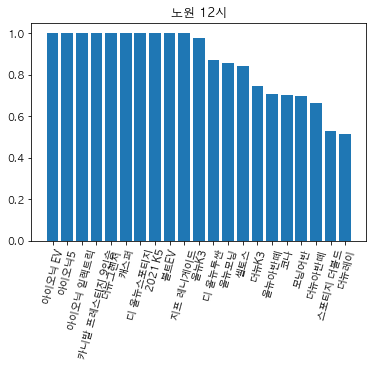

In [59]:
x=df_['차종']
y=df_['count']

plt.bar(x,y)
plt.xticks(rotation=75)
plt.title('노원 12시')

Text(0.5, 1.0, '강남 12시')

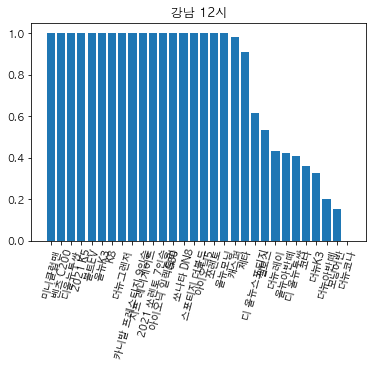

In [68]:
df1.to_csv('g12.csv')
g12 = pd.read_csv('g12.csv')

df1=g12.sort_values('count',axis=0,ascending=False)
df1
x=df1['차종']
y=df1['count']

plt.bar(x,y)
plt.xticks(rotation=75)
plt.title('강남 12시')